<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:60px; font-weight:bold;">Self Driving Challenge - Editie 2024</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

<img src="frontimage.jpg" alt="Self Driving Challenge Team" style="justify-content: center; align-items: center;">

Omdat er ook code wordt gebruikt in het notebook, importeren wij eerst alle nodige libraries. Daarna begint het overdrachtsdocument.

In [1]:
from functies.LaneLines import *
from functies.remote import *
from IPython.display import YouTubeVideo
import pandas as pd
import struct

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Loading YOLO Model...


<a name="Inleiding"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Inleiding</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Voor het vak DataLab IV van de opleiding Applied Data Science and Artificial Intelligence hebben wij meegedaan aan de Self Driving Challenge van 2024. Dit document is gemaakt voor het volgende team van de Haagse Hogeschool die mee gaat doen aan deze challenge. Je kan snel door de hoofdstukken bladeren door gebruik te maken van de sidebar, de knop om deze te openen staat links bovenin het scherm.

De groep waarin wij in 2024 hebben deelgenomen aan de Self Driving Challenge bestaat uit 5 studenten: Julia Boschman, Jasper Duncker, Busse Heemskerk, Johan Heskes en Tim Oosterling. Alle studenten zaten in het tweede jaar van de studie tijdens de deelnamen van de challenge. In de studie Applied Data Science and Artificial Intelligence wordt er veel gemodelleerd en daarom had het team een kleine voorsprong bij het verwerken van de obstakels in de challenge. Ook was er al wat kennis van Object Detection wat goed in combinatie ging met het modelleren.

In dit document nemen we je mee langs de challenge, onze technieken en delen we wat tips en tricks over de challenge. Onze hoop is om het komende team van de Haagse Hogeschool een kleine headstart te geven in de challenge van 2025. Dus hierbij wensen wij juliie succes.

Veel plezier met de deelname aan dit mooie project en geniet ervan!

<a name="RDW"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">RDW en SDC</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Het RDW (Rijksdienst voor het Wegverkeer) is de organisatie die zich bezighoudt met de registratie van gemotoriseerde voertuigen en de rijbewijzen in Nederland. De reden dat het RDW jaarlijks een self driving challenge organiseert is om studenten enthousiast te maken voor de sector autovoertuigen en mogelijk toekomstige collega's te werven.  

Niet iedere editie van de Self Driving Challenge zit hetzelfde in elkaar. Het zou kunnen dat de challenge van 2025 niet overeenkomt met de challenge van 2024, maar toch wordt er in het kort besproken wat de challenge van 2024 inhield.  

De editie van de Self Driving Challenge 2024 vond plaats in het testcentrum van het RDW in Lelystad. De challenge bestond als eerste natuurlijk uit het zelf laten rijden van een kart, die beschikbaar was vanuit het RDW, op een uitgelegd circuit. Deze baan begon met een recht stuk van 150 meter. Hierna moest er een kleine bocht gevolgd worden wat uitkwam op weer een recht stuk van ongeveer 60 meter. Het circuit eindigde met een scherpe bocht naar links, waardoor de kart weer met zijn neus naar de start van de baan stond. Naast het autonoom rijden op deze baan moesten er ook nog een aantal obstakels worden voltooid. Deze waren als volgt: 

- Het gaan rijden bij een groen stoplicht 
- Het stoppen voor een rood stoplicht 
- Het aanpassen aan de snelheid d.m.v. snelheidsborden 
- Het stoppen voor een voetganger bij een zebrapad (voor de challenge uitgebeeld met een pop) 
- Het inhalen van een stilstaande auto (voor de challenge uitgebeeld met een dummie auto)
- Het file parkeren van de auto aan het einde van het circuit 

Wanneer al deze obstakels goed werden uitgevoerd zonder ingreep van een persoon wordt de ronde goedgekeurd. Er zijn 4 verschillende versnellingen die alleen omhoog mocht wanneer deze obstakels allemaal goed waren uitgevoerd. De school die de challenge uiteindelijk heeft gewonnen is het team dat de meeste obstakels goed heeft afgelegd, met de snelste tijd. 

<a name="BelangrijkePunten"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Belangrijke punten en groepsverdeling</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Tijdens de challenge is het nodig om een aantal externe zaken goed te regelen. Zo is het mogelijk om bij de faculteit een budget te krijgen om de kosten voor de challenge te vergoeden. Hierbij gaat het om reiskosten, een harde schijf (erg aan te raden) en meer. Wij raden aan om aan het begin van het project gelijk achter het budget aan te gaan. Het rondkrijgen van het budget kan namelijk wel even duren. Om het budget te kunnen krijgen is het nodig om een begroting op te stellen en deze goed te laten keuren door de betrokkenen. Vervolgens moet de aanvraag voor het budget geregeld worden met de juiste personen, voor ons was dit de opleidingscoordinator voor ADS&AI: Mirjam Boer.

Binnen het team is het erg handig om een rolverdeling te maken. De meeste rollen zijn naar eigen invulling, maar een verplichte rol is die van teamcaptain. De teamcaptain moet ook aangegeven worden bij het RDW en zal dienen als contactpersoon voor het RDW en de andere teams tijdens de challenge. Het is belangrijk om iemand te kiezen die ook zijn mail goed in de gaten houd, aangezien alle algemene informatiemails, mails over testdagen en verzoeken van het RDW niet zomaar naar alle teamleden worden gestuurd. Voor die reden is het ook nodig dat de teamcaptain de aanmelding voor de testdag wekelijks mailt naar het RDW. Mocht je team willen ruilen is het handig om de contact informatie van de andere teamcaptains te hebben, zodat je deze kan berichten en kan kijken of iemand wilt wisselen. Het makkelijkste moment om dit te regelen is op de opening van de Self Driving Challenge, aangezien dit een van de weinige momenten is dat alle teams tegelijk op 1 locatie zijn. 

Overige rollen zijn, zoals eerder vermeld, naar eigen invulling. In ons team hadden wij gekozen om een notulist aan te stellen voor bij vergaderingen, maar dit is niet per se nodig. Kijk goed naar je team en kijk vooral naar de mogelijkheden voor rollen. Wel is het aan te raden om een aparte taakverdeling te hebben bij de opstart van de testdag. Zorg er in de eerste weken voor dat de rollen wisselen, op deze manier krijgt iedereen de rollen te zien en snapt iedereen de nodige handelingen. Uiteindelijk kan je vaste personen aanstellen voor een rol op de baan, op deze manier kan iedereen nog bijspringen indien nodig. Ook is het op deze manier niet erg als er iemand niet mee kan naar de testdag, aangezien de informatie bij iedereen bekend is.

Wat voor ons ook erg goed werkten was om aan het eind van elke werkdag een kort gesprek te hebben over wat is gelukt en wat er nog moet gebeuren. Op deze manier is iedereen zich bewust over de nodige taken en kan je elkaar verantwoordelijk houden. Zo blijft er overzicht en is er sprake van duidelijke communicatie en taakverdeling. Zorg er wel voor dat deze taakverdeling ergens wordt genoteerd, anders vergeten mensen de taken die ze moeten doen.

<a name="Hardware"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Hardware</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

In dit hoofdstuk ligt de focus op de hardware die beschikbaar is gesteld voor de gesloten categorie. We beginnen bij de kart, de mini-kart, dan gaan er praten over de computer en als laatste bespreken we de LiDAR.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">De kart</div>
    </div>
</div>

Voor het rijden in de gesloten categorie moeten we een elektrische kart aan sturen. De kart heeft 4 groepen van apparatuur nodig om te functioneren: aandrijving, sensoren, een zenuwstelsel en een brein. De aandrijving van de kart bestaat uit de motor, de remmen en het stuur. De motor van de kart beschikt over 4.7 horsepower en heeft 4 verschillende versnellingen. Elk van deze versnelling stelt de kart in staat om meer kracht te geven wanneer er vol gas wordt gegeven. Mocht de rem worden gebruikt gaat de motor automatisch in neutraal. De snelheid en versnelling waarmee alle teams in onze categorie bezig waren was versnelling 1, met een maximimum snelheid van ongeveer 11 km/h. De rem heeft een lineare aandrijving en de controller staat je toe om tussen de 0 en 100% van de gezette kracht te gebruiken. Daarnaast is de rem als enige niet gekoppeld aan de noodstop, dit zorgt ervoor dat, in geval van een noodstop, de rem op volle kracht gaat werken. Het stuur wordt gedreven door een servo motor, die in staat is om precisie en snelle bewegingen te maken.

De sensoren bestaan uit een LiDAR (meer daarover onderaan de paragraaf) en 3 camera's. De camera's filmen met een resolutie van 1920x1080 en zijn in staat om beeld op 60fps waar te nemen. Voor de challenge hebben we een camera en een LiDAR mee gekregen, naast een NUC, om te zorgen dat we kunnen oefenen met de apparatuur. Verdere uitleg over hoe de camera's data opnemen staat in het hoofdstuk Data Opnemen.

Nu zijn we aangekomen bij het zenuwstelsel van de kart, de CAN-bus. Met een CAN-bus kan je de componenten van de kart aansturen, wat gebeurt door berichten over het netwerk te sturen. Door deze berichten een indetifier mee te geven weet de CAN-bus naar welk component dit bericht moet. Er wordt dus eerst een identifier naar de CAN-bus gestuurd om te vertellen waar het bericht heen moet, bijvoorbeeld naar de motor. Daarna stuur je 8 bytes over de CAN-bus naar de motor. Elke byte kan informatie bevatten over wat de motor moet doen, zo bepaalt byte 1 het percentage gas en byte 3 de versnelling van de kart (neutraal, vooruit of achteruit). Daarnaast zijn er ook lege bytes, hiermee worden bytes bedoelt die geen informatie bijdragen en altijd op nul staan, bij de motor zijn dit bytes 2, 4, 5, 6, 7 en 8. Er kunnen meerdere berichten tegelijkertijd verzenden maar de kart kan deze niet tegelijk uitvoeren. Er wordt gekeken naar de identifier om te bepalen welke opdracht aan de kart prioriteit heeft, hoe lager het identifier hoe meer prioriteit de opdracht heeft. Om een totaal beeld van de kart te geven, is dit schema gemaakt door onze voorgangers.

![CANbus](canbus.png)

Dan heeft de kart nog het brein, dit is de NUC. Deze wordt later in het hoofdstuk besproken.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">De mini-kart</div>
    </div>
</div>

Naast de kart op de baan, is er ook een mini-kart. Deze mini-kart is samengesteld door Wouter en behoort tot het inspiratie lab. De mini-kart is in staat om, zodra alles is aangesloten, de code die voor de echte kart is bedoeld te runnen. Hierdoor is het mogelijk om vroegtijdig verschillende error uit de code te halen en mogelijk de code al een beetje aan te passen voor de testdag. De kart is voornamelijk handig om een basis begrip te krijgen over de mogelijkheden die de kart autonoom heeft. Je moet echter wel goed opletten! De mini-kart beschikte bij ons nog niet over remmen. Ook bleef de kart nog ongeveer 5 seconden na het stopzetten van de code doorgaan met het laatste commando. De echte kart begint meteen met uitrollen nadat de code is gestopt. Wees dus voorzichtig!


<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">NUC</div>
    </div>
</div>

De NUC, Next Unit of Computing, is een kleine minicomputer die op de kart kan worden aangesloten. Deze NUC functioneert niet anders dan een laptop of normale computer, echter is een NUC klein genoeg om in je hand te leggen. Het vormt het brein van de kart waar alle code opgeschreven moet worden. 

De NUC die wij van het RDW hebben gekregen en waar wij mee hebben moeten werken voor de challange had de volgende specificaties. 
 
NUC specifications:

|Onderwerp|Specificatie
|--|--
|Brand|Intel
|Model|NUC11PABi5
|Processor|Intel® Core™ i5-1135G7 Processor (8M Cache, up to 4.20 GHz) 
|RAM|16 GB
|Storage|512 GB (or similar)
|Input voltage|19 V 
|Thermal Design Power|40 Watt

Intel Core i5 is instaat om de meeste modellen te runnen, alleen kan het bij uitgebreidere modellen vaak traag zijn. Via https://cpu.userbenchmark.com/ kan je de effective speed vergelijken met de voorspeltijd van je eigen cpu (te vinden in taskmanager onder tab performance). 

De RAM slaat op het actieve geheugen van de NUC en wordt gebruikt bij het trainen en voorspellen van modellen. 16 GB moet genoeg zijn als je de NUC alleen gebruikt voor voorspellingen. 

De opslag van de NUC is 512 GB, dit moet genoeg zijn voor recording van 1 testdag. Als De Nuc te vol raakt veroorzaakt dit problemen met het opstarten van de NUC. Het is een goede gewoonte om na elke testdag de opgenomen files over te zetten naar een externe harde schijf. 

NUC connections:		 

|Poort|Aantal
|--|--
|Brand|Intel
|USB-A|3 (10GBps)
|USB-C|2 (Thunderbolt)
|HDMI|1
|DisplayPort|1 (mini)
|RJ45 LAN |1
|DC Port |1
|3.5mm Audio in/out |1

<br>
<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">LiDAR</div>
    </div>
</div>

LIDAR staat voor LIght Detection of Laser Imaging And Ranging en is een technologie die de afstand tot een object of oppervlak bepaalt door middel van het gebruik van laserpulsen. De LiDAR laser stuurt een laserpuls uit tot een object of oppervlak. De puls wordt vervolgens gereflecteerd. Op basis van de verstreken tijd tussen het uitzenden van de laserpuls en het opvangen van de reflectie wordt de afstand berekend. Autonome voertuigen gebruiken een Lidar om de omgeving om hen heen te scannen en objecten zoals andere voertuigen, voetgangers en verkeersborden te detecteren.  
 
LiDAR specifications:					 

|Onderwerp|Specificatie
|--|--
|Brand|SLAMTEC 
|Model|RPLIDAR A1M8 
|Range |0.15 - 6.00 m 
|Angle |0° - 360° 
|Scan rate |5.5 Hz (rotations per second)
|Sample frequency |>2000 
|Laser wavelength |775 - 795 nm
|Laser power |0.5 mW 
|Pulse length |110 µs 

Voor het gebruik van de Lidar in python zijn er meerdere python libraries beschikbaar, waarvan veel niet bijgehouden worden en out of date raken.  

(rplidar-roboticia, https://pypi.org/project/rplidar-roboticia/ ,https://github.com/Roboticia/RPLidar ) 

rplidar-roboticia heeft voor ons gewerkt en raden we aan om opnieuw te gebruiken als dit mogelijk is.  “lidar.iter_scans()” geeft een tuple met drie waardes terug (q,a,d).  

Waar q staat voor quality (0 tot 15) of confidence van de scan, a staat voor de hoek (0° - 360°) wat de lidar gescand heeft en d staat voor de afstand in mm. 

<a name="Software"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Software op de NUC</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Zoals elke computer komt de NUC ook met de nodige software. Het eerste wat zal opvallen is de OS van de NUc, Ubuntu. Indien je hier niet bekend mee bent, wees gerust. Ubuntu is ontworpen om gebruiksvriendelijk te zijn en er is ook een hoop informatie online te vinden. Door de open-source code van Ubuntu is er ook een grote community, waarbij al vele vragen zijn gesteld. Het belangrijkste aan de NUC is dat er goed en eenvoudig genavigeerd kan worden. Dit zal zowel via de NUC zelf als via een SSH-verbinding tussen een laptop en de NUC. In deze paragraaf wordt er besproken waar op gelet moet worden en hoe het gebruik van de NUC in elkaar steekt.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Navigeren van de NUC</div>
    </div>
</div>

Zoals eerder is vermeld werkt de NUC via Ubuntu, een operating system die is gebaseerd op Linux. Het werkt simpel, snel en vrijwel zelfwijzend. Zo worden alle bestanden gewoon opgeslagen in de file manager, FireFox is aanwezig als standaard internet browser en natuurlijk is ook de belangrijkste app voor de challenge aanwezig, Terminal. Alle apps zijn te vinden in de linker side-bar van het scherm, of door te zoeken binnen het systeem. Zorg wel dat je beschikt over een muis en toestenbord die je kunt aansluiten op de NUC, anders wordt het moeilijk om te navigeren binnen het systeem. 

De file manager is grotendeels gelijk aan die van windows of MAC. Er is een structuur met verschillende mappen, bestanden en links zitten een aantal van de standaard locaties. Sommige mappen zijn afgesloten omdat de SDC niet wilt dat je de ruwe functionaliteit van bepaalde aspecten aan gaat passen, zoals de code die de controller de kart laat aansturen. Andere mapjes zijn standaard beveiligd met het SDC account, deze kan je in door gebruik te maken van het verkregen wachtwoord. De rest werkt hetzelfde als in windows, je kan de bestanden slepen en verplaatsen tussen de verschillende mappen. 

Daarnaast is de terminal ook erg belangrijk om de NUC succesvol aan te sturen. De terminal is heel belangrijk voor het uiteindelijke verbinden met de NUC via de laptops, het gemakkelijk overzetten van de bestanden en het testen van de code. Via de terminal is het mogelijk om alle extra python libaries te installeren en ook om python te gebruiken, zowel in de vorm van Jupyter Notebooks en python scripts. Om dit te kunnen doen is het nodig om gebruik te maken van de verschillende terminal commands. Deze zijn universeel te gebruiken door de verschillende operating systems, dus het kan zijn dat deze al bekend zijn. Voor de personen bij wie dit onbekend is, hier is een klein overzicht over de meest nuttige commands:

`cd dir`: <br>
Het commando cd staat voor change directory en geeft je de mogelijkheid om naar een andere map te gaan. Door twee punten te gebruiken, in plaats van een directory naam, ga je een map terug. Je kan als dir ook het hele pad naar een directory geven, zo kan je ook via /downloads/onnodig/spullen naar de map spullen gaan. Het is niet nodig om in elke map cd te gebruiken!

`ls`: <br>
Het commando ls kan gebruikt worden om alle bestanden en mappen te zien die in de huidige map staan. 

`python3 scriptname.py`: <br>
Het commando python3 moet gecalled worden om python 3.0 of hoger te activeren. De scriptname.py is het script dat python moet runnen. Op deze manier kan de kart worden aangestuurd met python.

`candump can0 > filename.txt`: <br>
Het commando "candump can0 >" is de code die in staat is om alle canbus berichten te loggen en deze vervolgens op te slaan in een tekst bestand. Dit bestand heeft de naam die eraan is meegegeven. 

`sudo chmod a+rw /dev/ttyUSB0`: <br>
Dit is een meer specifiek command dat voor ons cruciaal was. Dit commando is nodig om python toegang te geven aan de LiDAR. Zonder deze command was het niet mogelijk om de LiDAR te gebruiken om de kart aan te sturen. 

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Python op de NUC</div>
    </div>
</div>

Om de kart uiteindelijk aan te sturen is er gebruik gemaakt van python code. Hiervoor is het niet nodig om zelf python te installeren, maar het kan wel nodig zijn om alle nodige, overige libraries te installeren. Libraries zoals pandas of numpy zijn al geinstalleerd, maar libraries als openCV en ultralytics zijn mogelijk nog niet geinstalleerd. Het is dus belangrijk om goed te kijken welke libraries wel of niet zijn geinstalleerd voordat je op locatie de kart gaat testen. Het is, uit ervaring, niet het meest praktische om libraries op locatie te installeren.

Naast de libraries is er ook het verschil in werken binnen scripts en werken in een Jupyter Notebook. Vanuit de opleiding ADS&AI zijn we gewent om alles in Jupyter Notebook te coderen, maar dit is niet handig voor het aansturen van de kart. Om de kart aan te sturen moet er worden gewerkt in python scripts. Hoewel niet veel anders dan een notebook met betrekking tot hoe de code werkt, is het wel handig om een begrip van beide te krijgen. Het belangrijkste verschil tussen scripts en notebooks is dat een notebook interactief is. Dit zorgt ervoor dat notebooks erg goed werken om code te testen of code te debuggen. Scripts kan je ook zien als een enkele code cell van een notebook, echter kan je deze alleen runnen vanuit je terminal. Het script kan dan worden uitgevoerd en runt de code binnen het script.

Het kan even aanpassen zijn om goed te leren werken in scripts, aangezien het minder overzichtelijk is en niet interactief werkt. Om te zorgen dat de overzichtelijkheid goed blijft, is het ten zeerste aan te raden om in functies en classes te gaan werken. Dit helpt ook met het oplossen van errors en het delen van de code met je medestudenten, aangezien de overzichtelijkheid ook impact heeft op de begrijpbaarheid van je code. Daarnaast is het wel aan te raden om zo veel mogelijk van de code te testen in notebooks, aangezien je een enkele cel kan gebruiken om te kijken of de code zou werken in een script!

<a name="Opnemen"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Data Opnemen</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Om de modellen goed te kunnen trainen is het nodig om voldoende data op te nemen. Hiervoor is het nodig om een script te hebben dat de volgende taken kan ondernemen: beelden opnemen en canbus berichten ontvangen, ontcijferen en opschrijven. Het voorbeeld van hoe dit is gegaan is te vinden in het bestand `rico.py`.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Beelden opnemen</div>
    </div>
</div>

Om foto’s op te nemen maken we gebruik van openCV. Met openCV zorgen we ervoor dat de camera’s beelden omzetten naar afbeeldingen, die vervolgens opgeslagen kunnen worden. Om de camera’s te vinden is er een configuratie bestand aangemaakt waar de paden van de afbeeldingen te vinden zijn. Dit JSON-bestand bevat de 3 verschillende camera’s, front, left en right, en de paden naar de camera’s toe.

Naast het configuratie bestand worden verschillende aspecten van de camera bepaald met behulp van openCV, zoals: 
- Aspect ratio van de beelden 
- Framerate van de camera 
- De hoeveelheid focus op de camera

Met deze drie aspecten kunnen de afbeeldingen op gewenste snelheid en formaat worden opgeslagen. Om ze op te slaan is naast de afbeelding ook een tijd opgenomen. Deze tijd wordt uiteindelijk gebruikt als naam, waardoor de afbeelding gemakkelijk te koppelen is aan de data. Uiteindelijk levert de code in `rico.py`, indien er niks cruciaals is veranderd, 3 verschillende mappen op met afbeeldingen: front, left en right.

In het begin zou het kunnen zijn dat de camera configuratie niet klopt. In dit geval moet het volgende gebeuren:
- Open het JSON bestand
- Kopieer de path tot het laatste gedeelte (de camera zelf)
- Plak dit na de command `cd` in de terminal
- Gebruik het command `ls` om de verschillende bestanden te zien (er zouden zes cameras te zien moeten zijn)
- Plak de bestanden met "index0" aan de achterkant in de configuratie
- Probeer opnieuw data op te nemen

Nadat deze positie goed staat is het belangrijk om ergens te noteren op welke wijze de kabels in de USB-poorten zaten. De manier hoe ze erin zitten is vanaf dit moment belangrijk omdat dit ervoor zorgt dat de config errors niet meer voor zouden moeten komen. Achteraf is het ook belangrijk dat er gekeken wordt naar de mappen, aangezien het voor kan komen dat front, left en right niet goed staan. Mocht dit het geval zijn, kunnen de keys in de JSON worden gewisseld zodat ze wel goed staan.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">CAN-bus berichten</div>
    </div>
</div>

De berichten van de CAN-bus zijn een beetje cryptisch, voornamelijk omdat ze een format van hexadecimale combinaties volgen in plaats van normale getallen. Aan de hand van deze hexadecimale getallen, in rijen van 8, is de CAN-bus in staat om berichten te interpreteren en door te sturen. Voor de CAN-bus is het ook nodig om te weten waar de berichten naartoe moeten gaan, dit is te zien aan de identifiers van de apparaten. Deze identifiers zijn belangrijk bij het inkijken van de data en bij ons waren de belangrijkste als volgt:
- 0x110: Rem
- 0x220: Stuur
- 0x330: Gas
- 0x440: Snelheid

Na de identifier volgt de reeks van 8 hexadecimale getallen die bij elkaar de instructie voor de kart bevatten. De bytes voor rem, stuur en gas bevatten uiteindelijke informatie die ook in staat zijn om reacties uit te voeren. Hierbij is het belangrijk dat je weet welke bytes de nodige informatie bevatten en op welke wijze ze zijn opgebouwd. Gelukkig had het RDW al code gemaakt die in staat was om data op te nemen en de CAN-bus berichten te vertalen naar normale getallen. Aan de hand van die code kregen wij data die werdt opgeslagen in een CSV bestand, met | als seperator. Later is deze code door ons opgeschoond, uitgelegd met comments en uitgebreid, dit is `rico.py`! De opgenomen CSV ziet er dan als volgt uit:

In [2]:
data = pd.read_csv(
    "Data/recording.csv",
    sep= "|"
)

data.iloc[4000:4005]

,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor,SpeedSensor
4000,1.712303e+09,-0.32393,49920.0,1.0,0.0,-165.0,100.0
4001,1.712303e+09,-0.32393,49920.0,1.0,0.0,-177.0,100.0
4002,1.712303e+09,-0.28518,49920.0,1.0,0.0,-185.0,110.0
4003,1.712303e+09,-0.23367,49920.0,1.0,0.0,-189.0,110.0
4004,1.712303e+09,-0.18189,49920.0,1.0,0.0,-190.0,100.0


In deze data is de volgende informatie te vinden:

|Kolom          |Mogelijke Waarden    |Uitleg
|--             |--                   |--
|Timestamp      |1710498235.9130464   |De timestamp waarop de afbeelding is genomen. De timestamp met '.png' extensie is de bijbehorende afbeelding.
|Steering       |Tussen -1.25 en 1.25 |Negatief geeft een stuurrichting naar links aan, terwijl positief een stuurrichting naar rechts aangeeft.
|SteeringSpeed  |49920                |De reden van deze waarden is niet erg duidelijk, aangezien deze overal gelijk is.
|Throttle       |Tussen 0 en 1        |Het percentage gas dat wordt gegeven. 0 is 0%, 1 is 100%.
|Brake          |Tussen 0 en 1        |Het kracht van de bruiking van de rem in percentages. 0 is 0%, 1 is 100%.
|SteeringSensor |Tussen -800 en 800   |De stuurhoek.
|SpeedSensor    |Tussen 0 en 1000     |De snelheid van de kart, opgenomen in Hm/s.

Aan de hand van deze data hebben we geleerd op basis van welke waarden de kart reageerde en welke waarden de aansturende code dus moest opleveren. Uiteindelijk was het natuurlijk nodig om de berichten succesvol terug te sturen. Om dit te doen was het nodig om de bytes klaar te zetten op een manier hoe de canbus het weer kan begrijpen. Dit ziet er als volgt uit:

In [3]:
# Opzetten van de verschillende parameters
rem = 0.0
stuur = 1.25
gas = 0.5
versnelling = 1   # 0: neutraal, 1: voorwaarts, 2: achteruit

# Opstellen van de lijst aan bytes
brake = [int(99*max(0, rem))] + 7*[0]
steering = list(bytearray(struct.pack("f", float(stuur)))) + 4*[0]
throttle = [int(99*max(0, gas)), 0, versnelling] + 5*[0]

print(
f"""
Rem bytes: {brake}
Stuur bytes: {steering}
Gas bytes: {throttle}
"""
)


Rem bytes: [0, 0, 0, 0, 0, 0, 0, 0]
Stuur bytes: [0, 0, 160, 63, 0, 0, 0, 0]
Gas bytes: [49, 0, 1, 0, 0, 0, 0, 0]



Bij de bovenstaande bytes zou de kart dus op halve snelheid een volle bocht naar rechts moeten nemen!

Deze bytes worden vervolgens periodiek over de canbus gestuurd, totdat ze weer worden geupdate. De canbus draait vervolgens op een vaste snelheid, waardoor er om de zoveel seconden een bericht wordt verstuurd. Bij ons was deze waarde 0.040, wat 40 miliseconden inhoud. Dit betekend ook dat de benchmark van snelheid voor modellen op de 0.040 seconden ligt, aangezien je het liefst geen delay hebt zitten tussen de voorspelling en de input.

<a name="Modellen"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">De Modellen</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Nu gaan we over naar de modellen die wij hebben gebruikt in de challenge. Hiervoor hebben wij gebruik gemaakt van Lane Detection, door middel van Computer Vision, en Object Detection, door middel van YOLO.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Lane Detection</div>
    </div>
</div>

Ons belangrijkste model is het lanedetectiemodel. Als dit model niet goed werkt, kan de kart de weg niet zien. Tijdens de competitie waren er teams die dit niet goed voor elkaar hadden. Hierdoor belandden ze meteen in de berm en konden ze de uitdaging niet voltooien, omdat ze daar niet heen konden rijden. Onze lanedetectie bestaat uit meerdere functies. Om het model goed te begrijpen, zullen we stap voor stap van ons lanedetectiemodel uitleggen. de code die we gebruiken voor ons model staat in het Python-bestand `LaneLines.py`.

Om het lanedetectie te testen hebben wij een paar test foto's, die wij in een list opslaan. De eerste foto is een rechte weg. De tweede foto is een bocht. Als laatste hebben wij een weg waar aan een kant geen doorgetrokken witte lijn is.

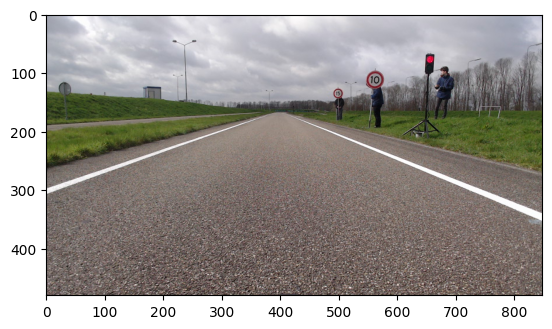

In [3]:
images = []
images.append(mpimg.imread('test_images/sdc_foto_1.png'))
images.append(mpimg.imread('test_images/sdc_foto_2.png'))
images.append(mpimg.imread('test_images/sdc_foto_3.png'))
images.append(mpimg.imread('test_images/obj_test.png'))

img = images[3]
plt.imshow(img)
plt.show()

Bij lanedetectie gebruiken we als eerste vogelperspectief. Dit betekent dat we de weg van bovenaf bekijken. Zo krijgen we een duidelijk en volledig beeld van de rijstroken en hun omgeving. Hierdoor kunnen we de rijstroken beter zien en volgen. Het vogelperspectief helpt ons om te zien waar de auto is ten opzichte van de rijstroken, wat belangrijk is voor een robust model. Het gebruik van een vogelperspectief zorgt dus voor betere precisie in lanedetectie, wat belangrijk is voor zelfrijdende auto's.








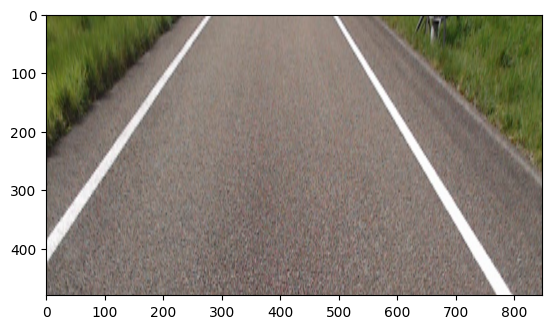

In [4]:
ll = LaneLines()
img1 = ll.forward_b(img)
plt.imshow(img1)
plt.show()

Bij de volgende stap filteren wij de afbeelding zodat alleen de witte pixels overblijven. Dit doen we om te zien waar de linker- en rechterlijnen zich bevinden.

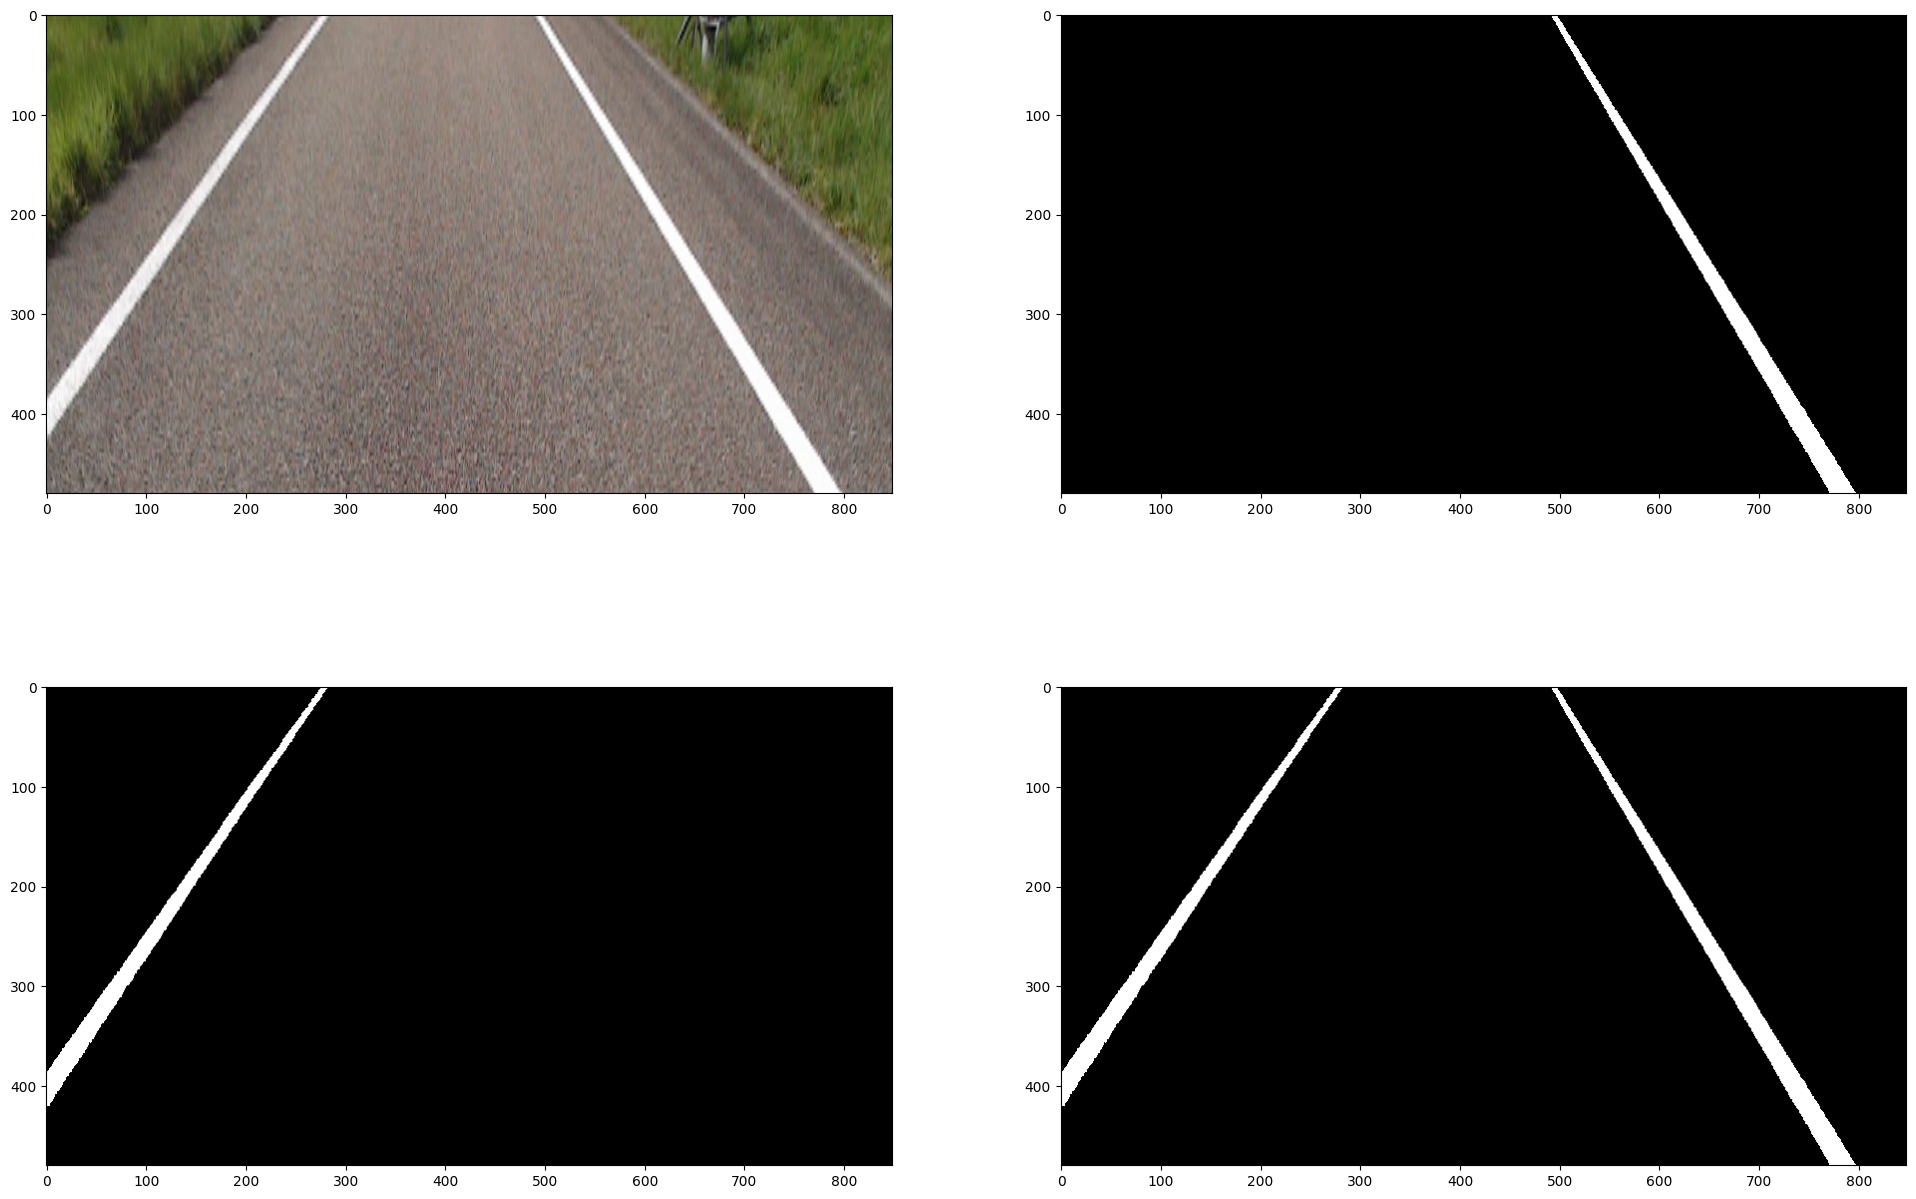

In [5]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = ll.threshold_rel(l_channel, 0.8, 1.0)
right_lane[:,:424] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = ll.threshold_rel(l_channel, 0.8, 1.0)
left_lane[:,424:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')
plt.show()

Als laatste stap berekenen we op basis van de witte lijnen de mogelijke positie van de weg. Daarna wordt de middenlijn van de weg berekend. De code berekent vervolgens de positie van de kart ten opzichte van de middenlijn. Als de positie 0.1 is, staat de kart 10 cm te ver naar rechts. Wij moeten dan iets naar links sturen.

positie: 0.47995283018867924


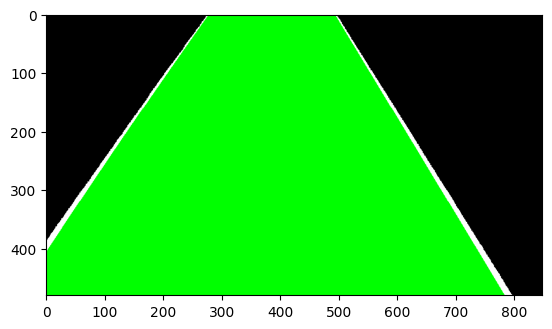

In [6]:
img3, left_curve, right_curve, pos = ll.forward(img2)
print("positie:", pos)
plt.imshow(img3)
plt.show()

We verplaatsen nu de lanedetectievisualisatie naar de originele foto. De auto doet dit niet om computerkracht te besparen, maar om de lanedetectie te testen in het notebook voeren we deze stap wel uit. Op deze manier kunnen we zelf controleren of het er goed uitziet.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


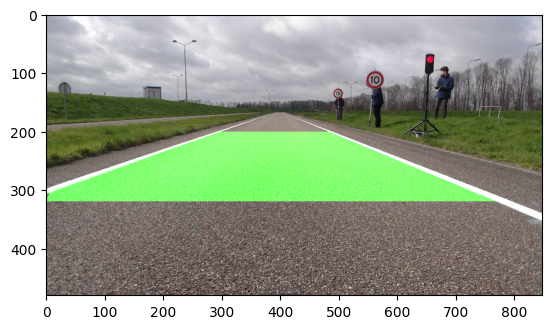

In [7]:
img4 = ll.backward(img3)
img4 = img4.astype(img.dtype)
out_img = cv2.addWeighted(img, 1, img4, 1, 0)
plt.imshow(out_img)
plt.show()

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Object detection</div>
    </div>
</div>

Voor onze objectdetectie is een Yolov8 Nano-model gebruikt. De dataset is samengesteld uit camerabeelden van de kart. Voor het model zijn 500 foto's gelabeld. Bij het selecteren van de foto's is gelet op variatie in lichtomstandigheden, omdat objecten er anders uitzien bij bewolkt weer dan bij een heldere blauwe lucht en felle zon. Uitgegaan is van ongeveer 100 foto's per object. De meeste foto's bevatten meerdere objecten, waardoor van sommige objecten meer foto's beschikbaar zijn. Door alleen foto's van de baan te gebruiken, ontstaat er overfitting, maar dat is niet erg omdat de baan niet wordt aangepast voor de finale.

Voor het labelen is CVAT.ai gebruikt, omdat wij deze website als eerste tegenkwamen en het goed werkt. Na het labelen is de dataset geëxporteerd als PASCAL VOC 1.1 en vervolgens geïmporteerd in Roboflow. Roboflow is gekozen vanwege de eenvoudige augmentatiemogelijkheden. Foto's in de dataset worden gekopieerd en aangepast om variaties in helderheid en saturatie te creëren, waardoor overfitting op weersomstandigheden wordt voorkomen. Na augmentatie bevat de dataset nu ongeveer 1500 foto's. Hiervan is 90% gebruikt voor training en 10% voor validatie. Testdata is niet nodig, de testmethode wordt uitgelegd in sectie 5.3. Nu de dataset compleet is, kan deze vanuit Roboflow worden geëxporteerd voor Yolov8. Bij interesse in deze data, neem contact met ons op.

Met de onderstaande code hebben wij de yolo model getraint.

In [8]:
HOME = os.getcwd()
#model = YOLO("yolov8n.yaml")  
#results = model.train(data=os.path.join(HOME, "data.yaml"), epochs=1000)  

Wanneer het YOLO model een afbeelding analyseert, geeft het als output een aantal bounding boxes. Dit zijn rechthoeken die de gevonden objecten in de afbeelding omsluiten, waarbij de coördinaten (x1, y1) de linkerbovenhoek en (x2, y2) de rechteronderhoek aangeven. Deze coördinaten geven precies aan waar in de afbeelding een object zich bevindt.

Naast de bounding boxes, geeft het model ook een lijst van class IDs, die corresponderen met specifieke types objecten. Voor elke bounding box en class ID geeft het model ook een confidence score, een getal tussen 0 en 1 dat aangeeft hoe zeker het model is van zijn voorspelling. Een hogere score betekent meer vertrouwen.

De class IDs worden gekoppeld aan class labels, zoals 'mens', 'auto', 'zebra', enzovoort, om de resultaten begrijpelijker te maken. De confidence score wordt aan de labelnaam toegevoegd om de zekerheid van het model te tonen.

Om de bounding boxes op een afbeelding te visualiseren, doorlopen we elke box, class ID en confidence score. We halen de coördinaten op om de positie en grootte van de rechthoek te bepalen, en gebruiken de class ID om de juiste labelnaam op te halen. Vervolgens tekenen we de bounding box op de afbeelding en plaatsen het label en de confidence score net boven de rechthoek.

Door deze stappen te volgen voor elke bounding box in de afbeelding, visualiseren we alle gedetecteerde objecten.


0: 384x640 1 zebra, 1 mens, 135.5ms
Speed: 6.5ms preprocess, 135.5ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)


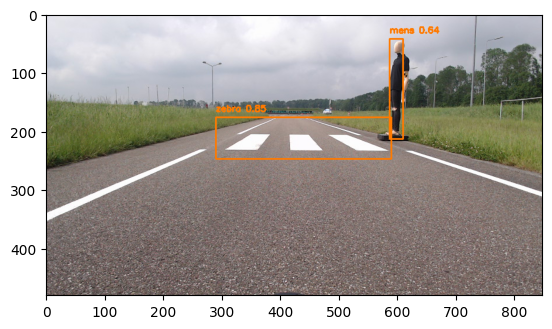

In [9]:
model = YOLO("obj_model.pt")
image_path = r"test_images/zebra.png"

img_obb = cv2.imread(os.path.join(HOME, image_path))
img = Image.fromarray(img_obb) 
results = model.predict(img)

# Draw bounding boxes on the image
for result in results:
    boxes = result.boxes.xyxy  # Extract bounding box coordinates
    classes = result.boxes.cls.cpu().numpy()  # Extract class IDs
    confidences = result.boxes.conf.cpu().numpy()  # Extract confidences
    class_to_label = result.names
    
    # Iterate over each detected object
    for box, class_id, confidence in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = map(int, box)
        if class_id in class_to_label:
            label_name = class_to_label[class_id] + " " + str(round(confidence, 2))  # Get label name from dictionary
        else:
            label_name = "Unknown" + " " + str(round(confidence, 2))  # If class ID not found in dictionary
        # Draw bounding box and label on the image
        cv2.rectangle(img_obb, (x1, y1), (x2, y2), (0, 122, 255), 2)
        cv2.putText(img_obb, label_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 122, 255), 2)

# Display the result
plt.imshow(cv2.cvtColor(img_obb, cv2.COLOR_BGR2RGB))
plt.show()

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Remote testing</div>
    </div>
</div>

Per week is de testbaan maar 1,5 uur beschikbaar. Het is daarom noodzakelijk dat je tussendoor de modellen kunt testen. Er zijn een paar manieren waarop je dit kunt aanpakken. Wij hebben in het begin veel gebruik gemaakt van video. Er is veel data opgenomen tijdens de testdagen. Het model of de pipeline die normaal gesproken de kart moet besturen, kan over de opgenomen data gaan om de resultaten te bekijken. Je hoeft dus niet naar Lelystad af te reizen om objectdetectie te testen.

Wat deze code doet, is het bekijken van een foto, de objecten voorspellen en de boxes tekenen. Vervolgens lopen we langs elke box en berekenen we de lengte en breedte. Deze informatie is belangrijk, omdat hoe dichterbij een object is, hoe groter de lengte en breedte zijn. We kunnen dus aan de hand van deze informatie zien hoe ver bijvoorbeeld een verkeerslicht van de kart afstaat. We kunnen dan coderen dat als een verkeerslicht op rood staat en dichtbij de kart is, de kart moet stoppen. Al deze berekeningen en tests kunnen we dus op onze laptop doen zonder kart, wat tijd bespaart op de testdag omdat er minder fouten zijn.

De code staat in `remote.py` en is als volgt te gebruiken:

In [ ]:
# Process de folder
process_folder(
    folder="front",
    base_folder_path="test_data",
    output_folder="output_for_video",
    speed_hmu=120,
    max_throttle=1.0
)

# Verander de afbeeldingen naar een video
create_video_from_images(
    image_folder="output_for_video",
    video_name="obj_new.mp4"
)

Deze code maakt van een map opgenomen afbeeldingen een video die gelijk is aan de volgende:

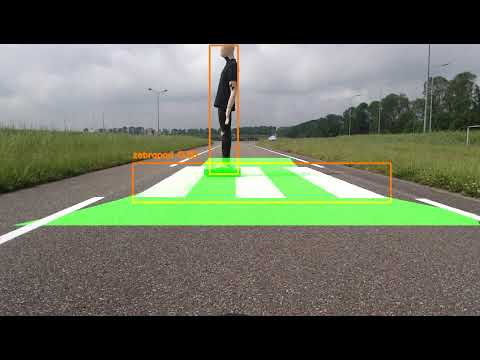

In [10]:
YouTubeVideo(
    'wS7gX7aDrIk',
    width=848,
    height=480
)

Naast het maken van een video is het ook mogelijk om de mini-kart te gebruiken. Let echter wel op het verschil tussen de dimensies van de kart en de mini-kart.

<a name="Testdagen"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Progressie van de challenge</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Iedere week was er de mogelijkheid om naar Lelystad te gaan, op een ingedeeld schema, om de code die geschreven was uit te testen op de kart en de baan. Aan het begin is het nog uitzoeken hoe dit goed gedaan kan worden, maar na een langere tijd komt er steeds meer ritme in. Het is dan ook belangrijk om een takenverdeling te maken om een goede start te kunnen maken en zo min mogelijk tijd te verspillen. Denk bijvoorbeeld welke mensen zorgen dat de kart volledige, op de goede plek, klaar staat en welke mensen ervoor zorgen dat de computer verbonden is met de kart. Hieronder wordt een overzicht gegeven van alles wat wij op deze testdagen gedaan en bereikt hebben. 

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Milestones</div>
    </div>
</div>

![Milestones.jpg](Milestones.jpg)

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Logboeken</div>
    </div>
</div>

- Week 1 (5 februari – 11 februari): 
Het semester begon op 5 februari waar de opdrachtgever, Wouter, een presentatie kwam geven in de klas over de Self Driving challenge bij ons vak “Datalab IV”. Hier hebben wij officieel de groep gevormd van vijf studenten van de studie ADS & AI. De challenge was nog niet begonnen dus deze week is er weinig gedaan, behalve het schrijven van een samenwerkingsovereenkomst. 


- Week 2 (12 februari – 18 februari): In de tweede week van het semester was de officiële opening van de Self Driving challenge in Lelystad. Hier zijn wij samen met onze begeleidende docent, Bob, en onze opdrachtgever, Wouter, naartoe gegaan. Er is een presentatie gehouden over de challenge met daarbij wat technische uitleg over de kart en alle hardware die erbij komt kijken. Ieder team dat deelneemt heeft zich hier voorgesteld. Ook was er een rooster vrijgegeven die aangaf dat er vanaf die week iedere vrijdag een testdag zal zijn, waar wij ook meteen gebruik van hebben gemaakt. Echter ging het regenen in Lelystad het moment dat het tijdslot begon. Omdat de kart niet waterdicht is en er een NUC (kleine computer) op zit mag de kart niet nat worden en werden deze dus ook meteen binnengezet. Het eerste plan was het afmeten van de baan en de kart, maar dat eerste deel ging al niet lukken. Wel zijn er afmetingen gemaakt van de kart die vervolgens zijn genoteerd om later te kunnen gebruiken tijdens het coderen. 


- Week 3 (26 februari – 3 maart): Deze week is er veel gewerkt aan documenten die voor het vak geschreven moesten worden. Zo moest er een domeinonderzoek en plan van aanpak geschreven worden waar iedereen een deel van heeft gemaakt. Op de donderdag was er een netwerkborrel op school waar onze groep een kleine presentatie heeft gegeven over de deelnamen aan de challenge. Vrijdag was er weer een testdag waar de hele groep een rondje heeft kunnen rijden in de kart, bestuurd door de Xbox controller, om een gevoel te krijgen van hoe de kart rijdt. Het idee was om code te runnen om data op te nemen, maar dit was niet gelukt. Met name, omdat wij een bestand aan code hebben overgenomen vanuit het RDW en deze niet goed gecodeerd was met de nieuwe instellingen van de kart. Dit, omdat er wat veranderingen waren ten opzichte van vorig jaar.  
 

- Week 4 (4 maart – 10 maart): In het begin van de week is er een schets gemaakt van de begroting. Vanuit de faculteit IT&D is er een bedrag beschikbaar gesteld waar ons team gebruik van kan maken voor bijvoorbeeld de aanschaf van teamkleding, de benzinekosten, de harde schijf, etc. Verder was er deze week een kleine miscommunicatie met het RDW waardoor onze groep niet was ingepland tussen de tijdvlakken. Aan het begin van de challenge moest er worden afgemeld met een mail, wat betekende dat je aanwezig zou zijn wanneer er niks was laten weten. Echter hadden ze dat de week hiervoor veranderd naar mailen wanneer er wel getest wilde worden. Wij hebben hier overheen gelezen waardoor er geen mail is gestuurd en er niet getest kon worden. Er was gewerkt aan het verbeteren van de code voor het opnemen die gebruikt kon worden in Lelystad. Let er dus goed op dat alle mails vanuit het RDW grondig worden doorgenomen! 


- Week 5 (11 maart – 17 maart): Dit was voor ons de week waar voor het eerst gekeken werd naar de obstakels uit de challenge. Het begon bij het online opzoeken en veel onderzoek doen naar de verschillende manieren hoe dit gedaan kan worden. Er was een verdeling gemaakt waar ieder obstakel één hoofdverantwoordelijke had, zodat niet iedereen hetzelfde zat te doen. Deze vrijdag is er wel een lichtpuntje geweest in Lelystad. Zo is er voor het eerst data opgenomen na een moeizame opstart, omdat het script met code niet wilde runnen op de NUC. Gelukkig zijn er altijd mensen van het RDW aanwezig die ons hebben geholpen waardoor wij voor 40 minuten lang hebben kunnen opnemen. Achteraf was het handiger geweest om hier losse opnames van te maken, omdat er achteraf tijd is verspild aan het uitzoeken en selecteren van losse rondes. Denk er dus aan om na ieder rondje het script aan en uit te zetten. 


- Week 6 (18 maart – 24 maart): Deze week liep weer wat moeizamer dan de vorige. Zo was er voorspeld dat het veel zou gaan regenen op ons gegeven tijdslot waardoor wij op de donderdag de keuze heeft gemaakt om de testdag af te zeggen. Achteraf hadden we alsnog binnen kunnen testen of er al iets van objecten herkend kon worden, maar dit hebben wij dus niet gedaan. Hier was het dus wel van belang dat er de week erna extra hard gewerkt moest worden om geen achterstand op te lopen. 


- Week 7 (25 maart – 31 maart): Wegens een aantal afwezigen in de groep waren er deze week twee teamleden aanwezig in Lelystad om te testen. Ze hebben hier alleen maar data kunnen testen, omdat er nog niet genoeg gecodeerd was om verder uit te testen. Hier is ook meteen gekeken naar de mogelijkheid van het halen van de bocht, met welke snelheid en welke hoek. Daarnaast is er nog gekeken naar de manier hoe er ingeparkeerd moet worden. Dit allemaal om een goede oriëntatie te krijgen van de uiteindelijke prestatie die de kart moet neerzetten. Na het opnemen is er vanuit huis ook nog gewerkt aan het EDA zodat wij hier maandag iets van aan de docenten konden laten zien. 


- Week 8 (1 april – 7 april): Deze vrijdag waren we weer allemaal aanwezig in Lelystad, inclusief onze opdrachtgever Wouter, en hebben voor het eerst de auto naar voren laten rijden. Dit was niet op basis van de camera, maar een scriptje die aangaf dat de auto een aantal secondes het gas moest “indrukken”. Er was dus nog geen stuur input, maar er kon wel gekeken worden naar de werking van het rijden van de kart op code. Jammer genoeg was de opstart stroef waardoor er niet veel meer getest is, wat erg zonde was. Wouter gaf aan dat er een betere verdeling gemaakt moest worden zodat iedereen kan helpen bij het klaarzetten van zowel de hardware als de software. 


- Week 9 (8 april – 14 april): De gehele groep liep op dit moment een beetje vast op het coderen van de obstakels van de challenge. Hier hebben wij een gesprek over gehad met een van de docenten van ADS & AI, Vikram, die ons heeft gewezen naar de Pub-Sub methode. Dit is een manier van een model creëren waarin er een publisher (hoofdtaak) is met een aantal subscribers. Hierin zou voor ons de pub de object detectie kunnen zijn en de subs zouden dan de specifieke obstakels zijn. Hier is het begin gemaakt naar onze uiteindelijke code die wij hebben gebruikt voor het aansturen van de kart. Verder ging het op de testdag weer moeizaam, omdat er geen goede verbinding gemaakt kon worden met de NUC. Wij denken dat dit komt, omdat wij de vorige keren erg veel data op de NUC hadden laten staan waardoor deze overvol was. Houd er dus rekening mee dat het handig is om een harde schijf aan te schaffen zodat de NUC na iedere testdag geleegd kan worden. Hierdoor hebben we ook niks succesvols kunnen doen in Lelystad. Naast de testdag was er ook nog een masterclass over de juridische kant van zelfrijdende auto's waar wij met het gehele team aan hebben deelgenomen. 


- Week 10 (15 april – 21 april): Het was weer gaan regenen tijdens het tijdsslot op de vrijdag waardoor er erg veel uitval was in groepen. Toch hebben wij ervoor gekozen om wel naar Lelystad te gaan, om binnen te kunnen testen. De kart was op een verhoging geplaats, zodat er wel gas input bekeken kan worden, en er was een stoplicht aanwezig. Er was een script geschreven die een stoplicht zou moeten herkennen, de kleur zou moeten aangeven en moeten doorgeven of er gestopt of gereden moest worden. Het was een goede keuze om toch naar Lelystad te gaan, omdat wij hier errors kregen die opgelost konden worden voor de volgende week waar weer getest werd op de baan. Zonder de testdag binnen hadden wij deze errors pas op de baan kunnen zien, wat te laat zou zijn geweest. Daarnaast hadden we binnen met WC-papier een kleine baan gemaakt, om te kijken of de auto al zelfstandig tussen de lijnen kon rijden. Op deze manier hebben we de eerste zelfstandige meters gemaakt, maar er was wel nog een hoop wat aangepast moest worden om goed op de baan te kunnen rijden. 


- Week 11 (22 april – 28 april): Deze week was wat hectischer dan de anderen. Een van de groepsgenoten was afwezig, twee groepsgenoten waren aanwezig op een masterclass over zelfrijdende auto's, in Eindhoven, en hierdoor konden er maar twee mensen aanwezig zijn in Lelystad. Jammer genoeg sloot de masterclass achteraf niet goed aan op ons project. In Lelystad is er een wat moeilijkere opstart geweest, omdat er maar twee man aanwezig waren en er een config error kwam die niet begrepen werd. Hier heeft iemand van het RDW bij geholpen zodat in ieder geval de code getest kon worden. In Lelystad waren wel de eerste stappen gemaakt voor de lane detection, waar de kart op een lage snelheid autonoom, tussen de lijnen heeft gereden tot aan de laatste scherpe bocht. Dit was de eerste keer dat de kart dit zo ver heeft kunnen doen.  


- Week 12 (29 april – 5 mei): Deze week waren er maar drie mensen aanwezig in Lelystad en is er weer aan het begin van het tijdsslot tijd verloren gegaan aan de config errors. Toen deze error was opgelost ging het regenen waardoor de kart naar binnen gebracht moest worden. Hier is een poging gedaan tot het uitproberen van de code voor het asynchroon programmeren om de object detectie en lane detection samen te laten lopen, maar deze werkte nog niet. Binnen is er ook een baan uitgelegd met wc-papier waar getest is op de bocht halen, maar omdat er in de bocht maar één lijn te zien is kan hij niet blijven insturen, omdat er geen midden berekend kan worden. Dit moet dus nog opgelost worden. 


- Week 13 (6 mei – 12 mei): Aan het begin van de week zijn twee studenten uit het team in gesprek gegaan met Michelle Lots van de DIF die een artikel wilde schrijven over de Self Driving Challenge. Daarnaast hebben wij in Lelystad getest om een rondje te rijden met de lane detection in een hogere snelheid dan afgelopen keren, maar de lane detection werkte zodanig langzaam dat hij meerdere keren de baan uit is gevlogen. De snelheid opvoeren heeft dus zeker invloed op de prestaties van je modellen. We hebben ook nog data opgenomen, zodat wij meer verschillende data hebben om uiteindelijk een model mee te trainen. 


- Week 14 (13 mei – 19 mei): Het autonoom rijden op een lage snelheid werkte redelijk goed dus werd het tijd om ervoor te zorgen dat de obstakels gedaan moesten worden. Door de week is er code geschreven voor zowel het stoplicht als het oversteken van de pop. In Lelystad is het eerste obstakel succesvol gereden. Zo is de kart gaan rijden wanneer het stoplicht op groen ging aan het begin van de baan. Hierna stopte de kart met runnen, omdat er een lijn code was die aangaf dat de kart geen gas zal geven wanneer er geen objecten gedetecteerd worden, wat niet goed uitpakte. Dit was dus geen goede manier voor ons om het object detection model te gebruiken. Verder was de pop en de auto er voor het eerste allebei, waardoor wij opnieuw data hebben opgenomen. Op deze manier was er data voor elk obstakel die getraind kon worden met een YOLOv8 model om alle obstakels te kunnen identificeren. 


- Week 15 (20 mei – 26 mei): Aan het begin van de testdag was er een probleem met de connectie tussen de kart en de stopknop, waardoor deze na een afstand van een paar meter al “out of range” was waardoor de kart automatisch blokkeerde. Dit probleem kwam voort uit het bijna leeg zijn van de stopknop. Dit hebben wij aangegeven en is door iemand van het RDW vervangen. In code is er wel veel vooruitgang geboekt. Er is nieuwe code geschreven voor het handelen op de objecten uit het object detectie model. Er werd opgemerkt dat de kart nog niet goed binnen de lijnen kon blijven op het lange, rechte stuk, dus is de kart getest vanaf het tweede stoplicht. Hier is de kart gestopt voor een rood stoplicht, gaan rijden bij een groen stoplicht, de snelheid aangepast en gestopt om te pop over te laten steken. Meteen 3 obstakels die succesvol behandeld waren. De reden dat de kart op het rechte stuk niet goed binnen de lijnen kon blijven lag aan de traagheid van de code voor de lane detection. Hier hebben wij dan ook de keuze gemaakt om asynchroon te gaan programmeren, zodat de object detectie en de lane detection parallel lopen aan elkaar en het zo minder traag zou moeten werken. 


- Week 16 (27 mei – 2 juni): Eindelijk is het gelukt om de LiDAR te connecten met de nuc zodat de output hiervan gebruikt kon worden om de auto in te halen en de auto in te parkeren. Aan het begin van de vrijdag in Lelystad ontstond er een probleem bij het testen van de code. De kart reageerde wel maar ging niet naar voren. Er werd wel opgemerkt dat er rem input werd gegeven en dus wel op de stoplichten reageerde. Dit bleek uiteindelijk een fout te zijn met de hardware waardoor de kart een aantal keer aan- en uitgezet moest worden. Daarna heeft de kart in Lelystad vanaf het begin tot aan het inhalen van de auto volledig autonoom gereden. De auto is uiteindelijk los getest en ingehaald, maar met niet de meest efficiënte code. Zo is er nog geen gebruik gemaakt van de LiDAR om te kijken wanneer de kart voorbij de auto is om terug te sturen. Er is een kleine kart aanwezig op de Haagse Hogeschool in Zoetermeer die wij kunnen gebruiken om het inhalen en in parkeren te testen voor de vrijdagen. Die is in week 16 en 17 goed gebruikt. 


- Week 17 (3 juni – 9 juni): Deze week zijn er wat e-mails uitgezet naar verschillende kranten, zoals het streekblad van Zoetermeer om media-aandacht te krijgen voor de challenge. Ze waren enthousiast en gaan een artikel over het team en de challenge schrijven. Daarnaast is er deze week weer iedere dag aan het project gewerkt om de laatste dingen als het inhalen van de auto, het halen van de bocht en het inparkeren af te ronden. In Lelystad was er tijdens het tijdslot voor de eerste keer zon, waardoor onze object detectie niet meer goed werkte. Zo werd er niet gestopt voor een rood stoplicht en konden de snelheidsborden niet goed afgelezen worden. Licht inval kan een groot verschil maken in het zicht van een camera en door het niet hebben van zonnige data in het object detectie model werkte het model minder goed. Hiervoor is nieuwe data opgenomen zodat er ook getraind kan worden met zonnige data, omdat het op de finaledag natuurlijk ook lekker weer kan worden. Er ontstond lichtelijke paniek wanneer het model geen goede voorspellingen maakte, omdat volgende week de finale gereden moet worden. 


- Week 18 (10 juni – 16 juni): De week van de finale! Het was een erg spannende en drukke week. Zo had het RDW nog 2 extra testdagen ingepland op de woensdag en de donderdag om alle teams een mogelijkheid te geven om de laatste code aan te passen en te testen. We hadden een pech week, omdat er beide testdagen zoveel file was dat we een half uur te laat aanwezig waren. Hierdoor is er veel waardevolle tijd verloren gegaan. Denk er dus goed aan om altijd rekening te houden met mogelijke file! Verder hebben wij de code gerund waar er nog steeds door een rood stoplicht werd gereden, omdat het model niet goed genoeg werkte en het weer zonnig weer was. Er is gekeken naar de aanpassingen die nog gedaan moesten worden om de auto te kunnen inparkeren en de auto in te halen. Er zijn nog enkele delen van de code aangepast, waardoor de auto nu goed ingehaald werd, alleen werd het inparkeren nog een uitdaging. Op de finaledag waren wij als eerste aan de beurt om 11.00. Hier hebben wij de eerste aantal keren tijdens het rechte stuk een auto gedetecteerd waardoor hij in de modus “auto inhalen” schoot. Er werd opgemerkt door een van de teamleden dat er een vlag in beeld was die redelijk leek op de auto en daarom zo geïdentificeerd werd. Wanneer deze vlag naar beneden was gehaald heeft de auto het gered tot aan de auto en is hier niet op tijd terug gaan sturen. De kart werd teruggereden en er was nog tijd voor een laatste poging. Hier is het gelukt om de auto in te halen, maar is de auto tijdens de bocht over de lijn gegaan. Met deze ronde hebben wij nog voor 2 teams lang op de eerste plek gestaan, maar uiteindelijk is de Haagse Hogeschool als tweede in de gesloten categorie geëindigd 


Als er meer vragen zijn over onze specifieke taken per persoon waar aan is gewerkt kan iemand uit het nieuwe team een aanvraag doen naar de persoonlijke logboeken die zijn gebruikt bij het maken van dit overzicht. Kijk hiervoor naar de contacten.

<a name="Problemen"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Problemen, oplossingen en Tips</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Tijdens de challenge zijn wij tegen meerdere problemen aangelopen. Graag zorgen wij, aan de hand van deze paragraaf, dat jullie je voor kunnen bereiden op deze problemen en ze mogelijk kunnen voorkomen! Daarnaast hebben wij ook een aantal tips over de challenge.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Grotere problemen</div>
    </div>
</div>

**Auto voor testdagen:** <br>
Zorg ervoor dat je als team consistent beschikbaar vervoer hebt naar de testbaan, bij ons was dit naar Lelystad. Hiervoor was OV absoluut geen optie en is het op de testbaan ook nodig om met een auto over te steken naar de juiste locatie. Op en neer rijden kost eenmaal tijd, geld en een auto.

**Errors in de code:** <br>
Indien je errors tegen komt, schrijf op hoe je deze oplost en hoe ze eruit zagen. In het geval dat een ander lid deze error tegen komt is het veel makkelijker op te lossen. Zo hadden wij meerdere keren problemen met de config error van de camera's, waarbij maar 1 teamlid wist wat er exact moest gebeuren. In het geval dat dit teamlid niet mee is en niet beschikbaar is, is het handig om een referentie voor de error te hebben.

**Leesbaarheid code:** <br>
Zorg ervoor dat de code leesbaar en makkelijk te begrijpen is. Dit helpt bij het oplossen van errors en het uitzoeken/uitleggen van de code aan andere leden, docenten of begeleiders. Dit maakt ook het krijgen van externe hulp makkelijker, aangezien mensen de code kunnen begrijpen.

**Lane Detection:** <br>
Mochten jullie uiteindelijk onze vorm van Lane Detection gebruiken, zijn er een paar problemen. Onze Lane Detection is erg slecht bij scherpe bochten en kan slecht tegen hoge snelheden. Daarnaast is onze Lane Detection specialist zelf ook niet goed op de hoogte hoe de code tot in detail werkt. Echter hebben we wel mogelijke oplossingen voor dit probleem! Het winnende team van editie 2024 heeft de Lane Detection voorbereid op scherpe bochten door de zichtbare lijn te kopieren en te verschuiven, indien er maar 1 lijn te zien is. Daarnaast zou de Lane Detection beter op hoge snelheden kunnen werken als er sprake is scaling van de stuurhoek, zodat de kart niet blijft overcompenseren. Wij hebben deze technieken niet meer kunnen proberen, maar misschien hebben jullie er wat aan!

**Wisselende omstandigheden:** <br>
Omdat we testen op een open baan, kan het weer van grote invloed zijn op tests en de finale race. Voorbereiden op regen wordt lastig, maar voorbereiden op zonlicht is ook belangrijk. De lijnen en de objecten zien er onder veel licht anders uit in kleur, waardoor object detection modellen moeite kunnen hebben om objecten te detecteren die opeens met veel licht worden beschenen of juist andersom. Zorg daarvoor dat je elke keer wat opneemt, vooral als de omstandigheden anders zijn.

Als het regent is er de kans dat je niet buiten op de baan mag testen. In dit geval moet je niet meteen afzeggen, maar wees binnen in de zaal creatief met het testen van je code. Heb je lijnen nodig, dan kan je ook A4'tjes of WC-papier gebruiken (en ja, dat laatste hebben wij getest. Het werkte prima!). Wees vooral niet bang om creatief met het testen om te gaan!

Daarnaast is het handig om rekening te houden met de extra ruis op de finale dag. Bij ons stonden er allemaal vlaggen, hekken en mensen om het begin van de baan. Gelukkig was het model hier redelijk op voorbereid, maar als dit niet gebeurd kan het plots erg fout gaan!

**Opslagruimte:** <br>
Het is belangrijk om voldoende opslagruimte beschikbaar te hebben voor de challenge. De afbeeldingen nemen erg veel ruimte in beslag en de NUC zelf kan het niet allemaal aan. Wij hebben een externe SSD-schijf aangeschaft om dit probleem te verhelpen. Let er daarbij wel op dat de NUC elke keer, na data opnemen, leeg wordt gemaakt.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Kleinere problemen</div>
    </div>
</div>

**Kennis delen:** <br>
Wij hebben door de challenge heen opgemerkt dat sommige leden significant meer kennis hadden over processen dan andere. Het is belangrijk om de informatie goed met elkaar te delen, zodat iedereen ziek kan zijn bij testdagen. Op deze manier voorkom je ook dat mensen vast blijven zitten aan 1 taak en worden de testdagen een stuk leuker voor iedereen.

**Duidelijkheid van de regels:** <br>
Zorg er tijdens de challenge voor dat je weet wat de limitaties zijn waaraan je je moet gaan houden. Weet wanneer je ronde wordt afgekeurd en zorg ervoor dat die situaties zo min mogelijk voorkomen.

**LiDAR Connectie:** <br>
Het was voor een aardige uitdaging om de LiDAR te gebruiken in python. Later zijn we erachter gekomen dat het lag aan het missen van een command. Na deze command hebben we de LiDAR goed kunnen gebruiken. Zorg er dus voor dat de LiDAR ook zo snel mogelijk gebruikt kan worden, aangezien wij er uiteindelijk erg lang mee bezig zijn geweest. De LiDAR kan een erg handige tool zijn, zolang je hem ook effectief kan gebruiken!

**Overfitting op de baan:** <br>
Net als het weer, kan overfitting op de baan ook voor onverwachte problemen zorgen. Zo hebben we van 1 team gehoord dat ze een keer problemen hadden ondervonden toen het gras bij de baan was gemaait, omdat de foto's daardoor te anders waren voor het model om het goed te begrijpen. Pas dus goed op extreme overfitting, een beetje kan geen kwaat voor de challenge.

<div style="background-color:#000060; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:15px; font-weight:bold;">Tips</div>
    </div>
</div>

**Files:** <br>
Let goed op het verkeer en mogelijke file! Je wilt niet te laat komen op de testdag, dat gaat gewoon van je tijd af!

**Logboeken:** <br>
Het bijhouden van logboeken kan voordelen hebben tijdens de challenge. Mocht iemand een keer ziek zijn of niet bereikbaar zijn kan je kijken wat de betreffende persoon heeft gedaan. Daarnaast kan het helpen met het doorgeven van informatie, aangezien je soms terug kan vallen op het logboek.

**Tijdslot:** <br>
Mocht een tijdslot door externe afspraken of het weer niet goed uitkomen, probeer te wisselen met een ander team. Testdagen zijn erg kostbaar, dus probeer er van zo veel mogelijk gebruik te maken.

**Begroting:** <br>
Begin snel met het aanvragen van de begroting. Het kan erg helpen om de eerste stappen al te hebben gezet indien je later vergoeding voor reiskosten of producten nodig hebt. Met name het hebben van een SSD kan niet genoeg worden benadrukt!

**Planning:** <br>
Goed plannen is erg belangrijk bij de challenge, aangezien de 18 weken zo voorbij zullen gaan. Zorg daarom dat je een goede en duidelijke planning hebt en houd je daaraan. Let op: maak niet alleen een planning voor de week zelf, maak ook planningen voor wat je op de testdag wilt doen.

**De wiki:** <br>
Lees de wiki van het RDW goed door zodra je deze krijgt. Dit kan van grote hulp zijn bij het uitvogelen van de hardware of sommige codeer onderdelen.

**Taken op de testdag:** <br>
Zorg ervoor dat je alle taken kan doen op de testbaan, maar probeer een enkele taak vaker te doen. Dit zorgt er uiteindelijk voor dat iedereen een keer te missen is tijdens het testen, maar dat je wel snel kan opstarten na de eerste weken.

**GPU:** <br>
Het hebben van een beschikbare GPU kan extreem veel tijd schelen zodra je eenmaal modellen gaat trainen. Probeer er een tot je beschikking te hebben.

**Werken met de kart:** <br>
Probeer zo snel mogelijk de kart op autonome wijze rijdend te krijgen. Op deze manier begin je een gevoel te krijgen voor wat er nodig is om de kart goed en effectief aan te sturen.

**Niks vergeten:** <br>
Het spreekt misschien voorzich, maar vergeet NIKS voor de testdag. De controller of een oplader is niet het einde, maar als je de NUC vergeet mee te nemen zal je niet veel meer kunnen doen.

**De competitie:** <br>
Laat je niet afleiden door de progressie van andere teams en focus op je eigen race. Als je bij ons kijkt, konden wij in week 14 nog niks. Uiteindelijk, met een beetje geluk, zijn we toch tweede geworden door te focussen op onze code en progressie.

**Tijdsbesteding:** <br>
Om zo hoog mogelijk te eindigen in de challenge, kan het erg veel tijd kosten. Zorg dat dit niet, indien toepasselijk, ten kosten gaat van je andere vakken.

**Connectie met de NUC houden voor errors:** <br>
Probeer Wireguard werkend te krijgen of mee te lopen met de kart terwijl hij autonoom rijdt. Dit helpt bij het oplossen van errors, zeker als je print statements voor debugging gebruikt.

**Distill modellen:** <br>
Voor een korte tijd hebben we een distill model geprobeerd te gebruiken. Uiteindelijk wilde dit nooit goed werken en was het een tijdverspilling, wij raden het erg af. Het labelen van data en het trainen van een Yolo model kost meer tijd, maar is wel beter in werking.

**Obstakels halen:** <br>
Uiteindelijk duurde het ons erg lang om goed te focussen op het halen van de obstakels, probeer dit sneller in te zetten. Elke overwinning die op de baan plaats vind is een stap in de juiste richting.

**Teamwork:** <br>
Wij hebben in elke pauze met elkaar lopen kaarten, waardoor de teamspirit en de communicatie er sterk is geworden. Probeer ook zoiets te doen, zeker als je elkaar wat minder goed kent. Een goede baan van communicatie kan het verschil maken tussen 1ste en laatste plek/

<a name="Contact"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Contact</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Mochten jullie nog overige vragen hebben, of extra uitleg/toelichting willen, kunnen jullie contact op nemen met de leden van onze groep! Mocht je ons niet vinden op de DIF, kan je via de email contact met ons openemen:
- Julia Boschman: 22074945@student.hhs.nl
- Jasper Duncker: 18014445@student.hhs.nl
- Busse Heemskerk: 22122877@student.hhs.nl
- Johan Heskes: 22132376@student.hhs.nl
- Tim Oosterling: 22078800@student.hhs.nl

<a name="Nawoord"></a>
<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Nawoord</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Wij waren zelf erg tevreden met het verloop van de challenge. Hoewel we erkennen dat er zeker verbeteringen waren, zijn we in 18 weken erg ver gekomen. Graag bedanken wij ieder die ons heeft geholpen in de challenge en de personen die ons steunde in de finale. Wel noemen we een aantal namen in het bijzonder:

**Bob Tuynman:** Docent ADS&AI en begeleider van de SDC 2024. <br>Bob heeft ons voor de challenge gevraagd of wij hier interesse in hadden om de SDC te doen voor het vak DataLab IV. Door het vertrouwen van Bob hebben we ook extra vertrouwen in onszelf kunnen krijgen. Bob zijn kennis over Deep Learning komt in de Self Driving Challenge goed van pas met een kritische kijk op mogelijke problemen en oplossingen. De gezellige sfeer die Bob met zich mee brengt hielp tijdens de feedback ronden ook met het geven van motivatie, zolang het woord bolletje maar niet opkwam. Zonder de gezelligheid, steun en vertrouwen waren wij niet zo ver gekomen.

**Wouter Pijnacker Hordijk:** Docent HBO-ICT en begeleider SDC 2024. <br>Ondanks een paar kleine momenten heeft Wouter een ongekende impact gehad op het team. Met dank aan zijn hardware kennis, de mini-kart en zijn enthousiasme hebben we het ver kunnen schoppen. Door de mini-kart is het ons uiteindelijk gelukt om de auto te kunnen inhalen op de baan en dat is het verschil geweest tussen tweede en derde plek. Ook is het motiverend om Wouter bezig te zien met Duckietown en, indien het nog niet is opgevallen, heeft dat ons ook positief beinvloed.

**Pascal van den Bosch:** Docent ADS&AI en vakbegeleider DataLab IV. <br>Doordat Pascal realistisch, eerlijk en ongefilterd is bij het geven van feedback weten we altijd wanneer iets minder goed gaat. Door op deze manier feedback te krijgen wisten we waar eventuele zwakke punten lagen en konden we hier met een nieuw perspectief naar kijken. Ook heeft Pascal geholpen bij het motiveren van sommige teamleden, door bonus bolletjes te geven op enkele momenten. Hoewel deze controversiele bolletjes af en toe voor ophef zorgden, eindigden de ophef vrijwel altijd in glimlachende mensen.

**Vikram Radhakrishan:** Docent ADS&AI. <br>Hoewel wij niet zoveel gebruik hebben gemaakt van zijn kennis als dat we wellicht moesten doen, hebben zijn inzichten ons wel verder geholpen in de challenge. Toen we eenmaal vastzaten heeft een gesprek met Vikram ons geholpen met wat ideeen, die vervolgens een acceleratie hebben veroorzaakt binnen ons team. Zonder die acceleratie was onze prestatie niet mogelijk geweest en daarvoor zijn we erg dankbaar. Ook was het fijn om een extra docent te zien in Lelystad tijdens de finale!

Vanuit alle teamleden willen we jullie bedanken voor de steun en ook willen we de andere docenten van ADS&AI bedanken voor de steun tijdens de finale en wat ze ons de afgelopen 2 jaar hebben geleerd. Het behalen van een tweede plek in de Self Driving Challenge is een erg mooi teken van wat ADS&AI in zich heeft en als onderdeel van de eerste lichting waren wij erg trots dat we de opleiding voor het eerst mochten vertegenwoordigen op een groter scherm.

Voor het team van volgend jaar, wij wensen jullie veel succes met de Challenge en we staan bereid om vragen te beantwoorden. Rijd vooral je eigen race en onthoud dat er een leger van eendjes, studenten en docenten achter je staat!

Namens het SDC team van 2024,

Julia, Jasper, Busse, Johan en Tim

<div style="background-color:#000040; color:#FFFFFF; padding:10px; border-radius:5px; display: flex; justify-content: space-between; align-items: center; position: relative;">
    <div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
        <div style="font-size:30px; font-weight:bold;">Bronnen</div>
    </div>
    <img src="AchterkantTShirt.png" alt="Self Driving Challenge" style="height: 100px; margin-left: 20px; border-radius: 5px;">
</div>

Voor de bronnen is niks anders gebruikt dan de Wiki van de Self Driving Challenge 2024. Omdat deze bestanden normaal gesproken in een beveiligde omgeving staan zullen er geen bestand of links in het document worden gedeeld. De concrete specificaties van de hardware komen van deze documenten.